In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

# Splitting the data
dev_set = data[0:1000].T
y_dev = dev_set[0]
x_dev = dev_set[1:n]
x_dev = x_dev / 255.

train_set = data[1000:m].T
y_train = train_set[0]
x_train = train_set[1:n]
x_train = x_train / 255.


In [23]:
y_train

array([5, 0, 1, ..., 2, 6, 1], dtype=int64)

In [24]:
x_train[:,0].shape

(784,)

In [31]:
# Initialise the parameters (weights , bias)
def init_params():
    w1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    w2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return w1, b1, w2, b2

# Activation functions
def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    Z = Z - np.max(Z)  # Subtract max value to avoid overflow
    exp_Z = np.exp(Z)
    sum_exp_Z = np.sum(exp_Z, axis=0) + 1e-8  # Add small constant to prevent division by zero
    return (exp_Z / sum_exp_Z)

def forward_prop(w1, b1, w2, b2, X):
    Z1 = w1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = w2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1,A1,Z2,A2

def deriv_ReLU(Z):
    return Z > 0

# def leaky_ReLU(Z, alpha=0.01):
#     return np.where(Z > 0, Z, alpha * Z)

# def deriv_leaky_ReLU(Z, alpha=0.01):
#     return np.where(Z > 0, 1, alpha)

# One-hot encoding the output array
def one_hot(Y):
    one_hot_y = np.zeros((Y.size, Y.max() + 1))
    one_hot_y[np.arange(Y.size), Y] = 1
    one_hot_y = one_hot_y.T
    return one_hot_y


def backward_prop(Z1, A1, Z2, A2, w1, w2, X, Y):
    one_hot_y = one_hot(Y)
    dZ2 = A2 - one_hot_y
    dw2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = w2.T.dot(dZ2) * deriv_ReLU(Z1)
    dw1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dw1, db1, dw2, db2

# Updating parameters
def update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha):
    w1 = w1 - alpha * dw1
    b1 = b1 - alpha * db1
    w2 = w2 - alpha * dw2
    b2 = b2 - alpha * db2
    return w1, b1, w2, b2
    

In [32]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, iterations, alpha):
    w1, b1, w2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(w1, b1, w2, b2, X)
        dw1, db1, dw2, db2 = backward_prop(Z1, A1, Z2, A2, w1, w2, X, Y)
        w1, b1, w2, b2 = update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha)
        if (i % 10 == 0):
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return w1, b1, w2, b2

In [33]:
w1, b1, w2, b2 = gradient_descent(x_train, y_train, 500, 0.1)

Iteration:  0
[8 8 5 ... 8 5 8] [5 0 1 ... 2 6 1]
0.07251219512195121
Iteration:  10
[7 2 5 ... 6 5 8] [5 0 1 ... 2 6 1]
0.18851219512195122
Iteration:  20
[9 2 5 ... 3 9 1] [5 0 1 ... 2 6 1]
0.2918292682926829
Iteration:  30
[9 2 5 ... 2 9 1] [5 0 1 ... 2 6 1]
0.3750731707317073
Iteration:  40
[9 2 5 ... 2 9 1] [5 0 1 ... 2 6 1]
0.43878048780487805
Iteration:  50
[9 2 5 ... 2 9 1] [5 0 1 ... 2 6 1]
0.49641463414634146
Iteration:  60
[9 5 5 ... 2 9 1] [5 0 1 ... 2 6 1]
0.5428536585365854
Iteration:  70
[9 5 2 ... 2 9 1] [5 0 1 ... 2 6 1]
0.5792682926829268
Iteration:  80
[9 5 2 ... 2 4 1] [5 0 1 ... 2 6 1]
0.6068536585365853
Iteration:  90
[8 5 2 ... 2 4 1] [5 0 1 ... 2 6 1]
0.6308292682926829
Iteration:  100
[8 5 2 ... 2 4 1] [5 0 1 ... 2 6 1]
0.6510731707317073
Iteration:  110
[8 5 1 ... 2 4 1] [5 0 1 ... 2 6 1]
0.6681463414634147
Iteration:  120
[8 5 1 ... 2 4 1] [5 0 1 ... 2 6 1]
0.6842439024390244
Iteration:  130
[8 5 1 ... 2 4 1] [5 0 1 ... 2 6 1]
0.697560975609756
Iteration:  14

In [34]:
def make_predictions(X, w1, b1, w2, b2):
    _, _, _, A2 = forward_prop(w1, b1, w2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, w1, b1, w2, b2):
    current_image = x_train[:, index, None]
    prediction = make_predictions(x_train[:, index, None], w1, b1, w2, b2)
    label = y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [8]
Label:  8


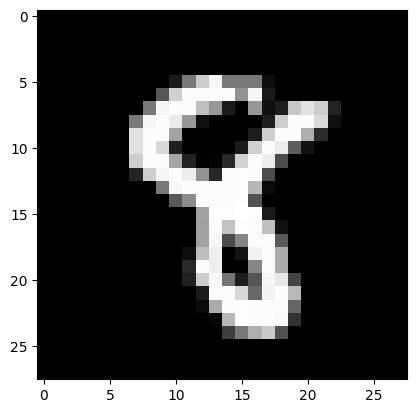

In [38]:
test_prediction(9, w1, b1, w2, b2)



In [36]:
dev_predictions = make_predictions(x_dev, w1, b1, w2, b2)
get_accuracy(dev_predictions, y_dev)

[6 6 6 5 9 6 6 7 7 3 3 1 2 1 7 4 1 7 5 9 7 7 4 3 6 7 0 4 7 2 6 4 1 5 9 9 8
 6 2 0 1 4 3 5 4 2 5 9 0 8 6 3 3 4 1 0 8 7 8 1 1 7 5 1 3 1 0 7 8 0 1 5 3 0
 4 7 0 3 1 7 0 5 6 7 3 1 9 8 7 5 0 4 4 9 9 2 2 3 9 9 7 2 0 6 2 1 4 0 1 6 3
 8 5 5 8 7 0 3 9 1 2 7 5 1 4 2 5 3 3 3 3 3 5 3 9 2 7 6 2 0 7 9 3 9 6 4 9 9
 5 6 6 0 2 7 3 7 7 5 4 6 3 5 0 3 8 0 2 4 3 4 0 8 9 9 6 7 0 1 4 1 2 1 1 5 9
 0 3 5 3 2 9 3 3 1 9 8 0 8 6 6 2 4 4 1 4 8 2 1 2 7 6 9 0 4 9 9 0 8 1 0 4 2
 4 0 6 6 9 3 6 5 6 1 8 9 9 7 1 3 2 2 7 5 5 7 6 7 4 9 5 6 0 8 1 2 0 0 4 7 8
 6 3 7 0 1 7 0 4 7 3 2 2 0 6 6 3 2 4 9 1 0 6 9 3 3 1 7 7 4 1 6 2 7 1 0 6 1
 6 5 8 4 1 9 5 1 4 3 1 1 4 8 3 1 9 2 8 0 1 5 4 5 5 8 0 3 7 4 3 7 3 1 8 0 6
 8 4 0 5 4 6 6 8 3 6 9 7 2 9 0 4 2 2 1 9 2 1 9 3 0 5 7 7 5 7 4 2 9 0 4 6 9
 4 5 0 3 3 0 2 6 8 2 4 3 7 2 0 7 6 1 5 5 9 4 7 0 1 7 8 0 9 1 2 0 6 5 5 9 3
 6 7 3 6 7 0 9 3 1 7 7 7 7 3 4 4 0 2 0 3 1 1 0 4 7 3 8 6 3 5 9 3 0 3 8 7 6
 8 9 5 9 2 4 3 1 7 8 1 6 7 3 7 4 7 5 4 9 1 6 7 2 0 7 1 6 2 1 3 6 7 5 5 3 7
 8 9 6 7 8 9 8 0 4 1 0 4 

0.843